In [1]:
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
from principal_RBM_alpha import *
from principal_DBN_alpha import *
from principal_DNN_MNIST import *
from sklearn.preprocessing import OneHotEncoder
from utils import *

On charge la base de donnée

In [2]:
X_, y_ = loadlocal_mnist(images_path='train-images-idx3-ubyte',
                         labels_path='train-labels-idx1-ubyte')
#On split notre base de donnée
X_train = X_[:10000]
y_train = y_[:10000]
X_test = X_[10000:12000]
y_test = y_[10000:12000]
#On binarise les images
X_train = np.where(X_train > 126, 1, 0)
X_test = np.where(X_test > 126, 1, 0)
#On encode les targets
oh = OneHotEncoder()
y_train = oh.fit_transform(y_train.reshape(-1,1)).toarray()
y_test = oh.fit_transform(y_test.reshape(-1,1)).toarray()

In [3]:
# Valeurs des hyper paramètres
vect_DNN = [784, 100, 50, 10] #taille du réseau DNN
n_iter_RBM = 100
n_iter_DBN = 200
lr = 0.01
batch_size = 32

Epoch 1 out of 100, loss: 0.03900881638865195
Epoch 20 out of 100, loss: 0.026760749483949266
Epoch 40 out of 100, loss: 0.02666127995332111
Epoch 60 out of 100, loss: 0.026468620935174603
Epoch 80 out of 100, loss: 0.026484362244973532
Epoch 100 out of 100, loss: 0.02655798579695746
Epoch 1 out of 100, loss: 0.07812606594561194
Epoch 20 out of 100, loss: 0.036016302331379826
Epoch 40 out of 100, loss: 0.03423612229130937
Epoch 60 out of 100, loss: 0.03337435593363167
Epoch 80 out of 100, loss: 0.032911514145112
Epoch 100 out of 100, loss: 0.03248956111203014
Epoch 1 out of 100, loss: 0.12917064116806948
Epoch 20 out of 100, loss: 0.10077285062604611
Epoch 40 out of 100, loss: 0.09976619575397333
Epoch 60 out of 100, loss: 0.0990681849323756
Epoch 80 out of 100, loss: 0.09917039556377659
Epoch 100 out of 100, loss: 0.09842719406841809
Epoch 1 out of 200. CELoss value is 16.10498526697911
Epoch 25 out of 200. CELoss value is 3.933996543969985
Epoch 50 out of 200. CELoss value is 2.67441

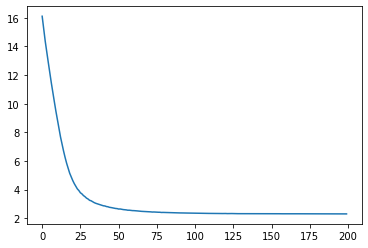

325 2000
The percentage of false labeled data is  83.75


83.75

In [4]:
dnn = DNN(vect_DNN) #On initialise le DNN

dnn, losses = dnn.pretrain_DBN(X_train, batch_size = batch_size, n_epoch = n_iter_RBM) #On entraine de manière
                                                                                        #non supervisée

dnn, loss = dnn.retropropagation(data = X_train, labels = y_train, epochs = n_iter_DBN,
                                 batch_size = batch_size, lr_rate = lr)  #On entraine ensuite de manière supervisée
plt.plot(loss)
plt.show()

dnn.test_dnn(X_test, y_test)

In [5]:
dnn.get_pred(X_test[:5])

array([[0.09106925, 0.09453731, 0.07690685, 0.09802794, 0.07228693,
        0.12445389, 0.09999393, 0.14235545, 0.11990315, 0.0804653 ],
       [0.04712259, 0.09895196, 0.16538787, 0.08992621, 0.06507693,
        0.07323188, 0.07999816, 0.08763891, 0.173566  , 0.1190995 ],
       [0.12896429, 0.13947261, 0.11098943, 0.07308576, 0.09134237,
        0.0886816 , 0.1103461 , 0.09022659, 0.0965997 , 0.07029154],
       [0.1053543 , 0.13111979, 0.1198934 , 0.09313372, 0.11290164,
        0.07108603, 0.07547029, 0.10388703, 0.08821057, 0.09894325],
       [0.11440491, 0.12630796, 0.0692883 , 0.11178687, 0.09138511,
        0.09487633, 0.08766154, 0.134541  , 0.06805151, 0.10169648]])

In [ ]:
X_test

## Analyse

In [ ]:
dnn1 = DNN(vect_DNN)
dnn2 = DNN(vect_DNN) # On initialise deux réseaux identiques

In [ ]:
plt.figure(figsize=(12,7))
plt.title("Évolution de la Cross-Entropy pendant l'entraînement")
plt.xlabel('Update des paramètres')
plt.ylabel('$-\sum ylog(\hat{y})$')
plt.plot(losses_1)
plt.grid()
plt.show()

In [ ]:
plt.plot(loss)
plt.show()

dnn.test_dnn(X_test, y_test)